In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
PATH = "data/dataset-master/"
sz = 224
arch = resnext101_64
bs = 27
import pandas as pd


In [24]:
label_df = pd.read_csv(f'{PATH}labels.csv')

In [62]:
import os
c = os.listdir(path=f'{PATH}JPEGImages'); 
f = set()
   

BloodImage_00064.jpg
BloodImage_00028.jpg
BloodImage_00013.jpg
BloodImage_00379.jpg
BloodImage_00287.jpg
BloodImage_00403.jpg
BloodImage_00053.jpg
BloodImage_00216.jpg
BloodImage_00021.jpg
BloodImage_00243.jpg
BloodImage_00078.jpg
BloodImage_00062.jpg
BloodImage_00241.jpg
BloodImage_00167.jpg
BloodImage_00252.jpg
BloodImage_00079.jpg
BloodImage_00049.jpg
BloodImage_00254.jpg
BloodImage_00144.jpg
BloodImage_00141.jpg
BloodImage_00050.jpg
BloodImage_00041.jpg
BloodImage_00255.jpg
BloodImage_00220.jpg
BloodImage_00231.jpg
BloodImage_00184.jpg
BloodImage_00398.jpg
BloodImage_00097.jpg
BloodImage_00175.jpg
BloodImage_00135.jpg
BloodImage_00057.jpg
BloodImage_00276.jpg
BloodImage_00390.jpg
BloodImage_00219.jpg
BloodImage_00409.jpg
BloodImage_00063.jpg
BloodImage_00261.jpg
BloodImage_00152.jpg
BloodImage_00042.jpg
BloodImage_00377.jpg
BloodImage_00114.jpg
BloodImage_00385.jpg
BloodImage_00183.jpg
BloodImage_00203.jpg
BloodImage_00059.jpg
BloodImage_00357.jpg
BloodImage_00095.jpg
BloodImage_00

In [123]:
f = []
for each in c: 
    name,suffix = each.split('.')
    f.append(name)
    
sorted(f)


['BloodImage_00000',
 'BloodImage_00001',
 'BloodImage_00002',
 'BloodImage_00003',
 'BloodImage_00004',
 'BloodImage_00005',
 'BloodImage_00006',
 'BloodImage_00007',
 'BloodImage_00008',
 'BloodImage_00009',
 'BloodImage_00010',
 'BloodImage_00011',
 'BloodImage_00012',
 'BloodImage_00013',
 'BloodImage_00014',
 'BloodImage_00015',
 'BloodImage_00016',
 'BloodImage_00017',
 'BloodImage_00018',
 'BloodImage_00019',
 'BloodImage_00020',
 'BloodImage_00021',
 'BloodImage_00022',
 'BloodImage_00023',
 'BloodImage_00024',
 'BloodImage_00026',
 'BloodImage_00028',
 'BloodImage_00029',
 'BloodImage_00030',
 'BloodImage_00031',
 'BloodImage_00032',
 'BloodImage_00033',
 'BloodImage_00034',
 'BloodImage_00035',
 'BloodImage_00036',
 'BloodImage_00037',
 'BloodImage_00038',
 'BloodImage_00039',
 'BloodImage_00040',
 'BloodImage_00041',
 'BloodImage_00042',
 'BloodImage_00043',
 'BloodImage_00044',
 'BloodImage_00045',
 'BloodImage_00046',
 'BloodImage_00047',
 'BloodImage_00048',
 'BloodImage_

In [47]:
naming = {1:'BloodImage_0000', 2:'BloodImage_000', 3:'BloodImage_00'}

In [48]:
label_df['id']=label_df['Image'].apply(str).str.len().map(naming) + label_df['Image'].apply(str)

In [49]:
label_df.drop(label_df.columns.difference(['Category','id']),axis=1,inplace=True);  label_df

,Category,id
0,NEUTROPHIL,BloodImage_00000
1,NEUTROPHIL,BloodImage_00001
2,NEUTROPHIL,BloodImage_00002
3,NEUTROPHIL,BloodImage_00003
4,NEUTROPHIL,BloodImage_00004
5,NEUTROPHIL,BloodImage_00005
6,NEUTROPHIL,BloodImage_00006
7,NEUTROPHIL,BloodImage_00007
8,BASOPHIL,BloodImage_00008
9,EOSINOPHIL,BloodImage_00009


In [50]:
label_df.dropna(axis=0,inplace=True)

In [51]:
label_df.set_index('id',inplace=True)

In [76]:
label_df[label_df.index == 'BloodImage_00117']

,Category
id,


In [35]:
label_df.to_csv(f'{PATH}labels2.csv')

In [56]:
newdf = pd.read_csv(f'{PATH}labels2.csv'); newdf.id, 
#newdf.drop(newdf.columns[0],axis=1, inplace=True)

(0      BloodImage_00000
 1      BloodImage_00001
 2      BloodImage_00002
 3      BloodImage_00003
 4      BloodImage_00004
 5      BloodImage_00005
 6      BloodImage_00006
 7      BloodImage_00007
 8      BloodImage_00008
 9      BloodImage_00009
 10     BloodImage_00010
 11     BloodImage_00011
 12     BloodImage_00012
 13     BloodImage_00013
 14     BloodImage_00014
 15     BloodImage_00015
 16     BloodImage_00016
 17     BloodImage_00017
 18     BloodImage_00018
 19     BloodImage_00019
 20     BloodImage_00020
 21     BloodImage_00021
 22     BloodImage_00022
 23     BloodImage_00023
 24     BloodImage_00024
 25     BloodImage_00026
 26     BloodImage_00028
 27     BloodImage_00029
 28     BloodImage_00030
 29     BloodImage_00031
              ...       
 337    BloodImage_00376
 338    BloodImage_00377
 339    BloodImage_00378
 340    BloodImage_00379
 341    BloodImage_00381
 342    BloodImage_00382
 343    BloodImage_00383
 344    BloodImage_00384
 345    BloodImage_00385


In [131]:
x = set(newdf.index).difference(set(f));
y = set(f).difference(set(newdf.index))
for each in x:
    try :
        newdf.drop([each],inplace=True)
    except:pass

for each in y:
    try :
        newdf.drop([each],inplace=True)
    except:pass


In [132]:
newdf.to_csv(f'{PATH}labels2.csv')

In [165]:
newdf

,Category
id,
BloodImage_00000,NEUTROPHIL
BloodImage_00001,NEUTROPHIL
BloodImage_00002,NEUTROPHIL
BloodImage_00003,NEUTROPHIL
BloodImage_00004,NEUTROPHIL
BloodImage_00005,NEUTROPHIL
BloodImage_00006,NEUTROPHIL
BloodImage_00007,NEUTROPHIL
BloodImage_00008,BASOPHIL


In [25]:
label_df.pivot_table(index="Category", aggfunc=len).sort_values('Image',ascending=False)


,Image,Unnamed: 0
Category,,
NEUTROPHIL,207,207.0
EOSINOPHIL,88,88.0
LYMPHOCYTE,33,33.0
MONOCYTE,21,21.0
BASOPHIL,3,3.0
"NEUTROPHIL, NEUTROPHIL",3,3.0
"NEUTROPHIL, EOSINOPHIL",2,2.0
"NEUTROPHIL, LYMPHOCYTE",1,1.0
"NEUTROPHIL,EOSINOPHIL",1,1.0


In [4]:
label_csv = f'{PATH}labels2.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n) # random 20% data for validation set 

In [5]:
val_idxs

array([193,  33,  15, 309,  57, 183,  76, 119, 152, 126, 338,  39, 304,  55, 137, 300,   0, 275, 329, 101,
         9, 165,  72, 253, 248, 195, 220, 292, 349, 361,  25, 108,  42, 352, 196, 114,  63,  22, 342, 331,
       242, 345,  30, 297, 109, 234,  90,  56,   5,  45, 233, 346, 283, 262, 176, 337,  93,   3, 359,  77,
       237, 347,  78,  46, 265,  73, 224, 124, 203,  82,  94, 192, 325])

In [6]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'JPEGImages', f'{PATH}labels2.csv', # we need to specify where the test set is if you want to submit to Kaggle competitions
                                   val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)

In [8]:
fn ='data/dataset-master/JPEGImages/BloodImage_00113.jpg'

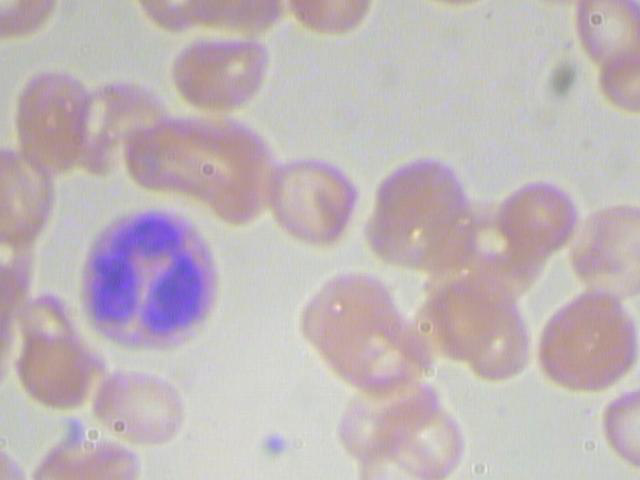

In [9]:
img = PIL.Image.open(fn); img

In [10]:
img.size


(640, 480)

In [28]:

size_d={}
for k in data.trn_ds.fnames:
    try: 
        c = PIL.Image.open(PATH + k).size
        size_d[k]= c
    except: pass

In [29]:
row_sz, col_sz = list(zip(*size_d.values()))

In [30]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

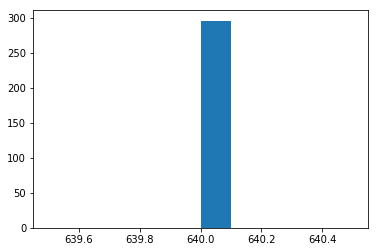

In [31]:
plt.hist(row_sz);

In [32]:
len(data.trn_ds), len(data.test_ds)

AttributeError: 'NoneType' object has no attribute 'dataset'

In [149]:
data.val_ds.fnames

array(['JPEGImages/BloodImage_00000.jpg', 'JPEGImages/BloodImage_00003.jpg',
       'JPEGImages/BloodImage_00005.jpg', 'JPEGImages/BloodImage_00009.jpg',
       'JPEGImages/BloodImage_00015.jpg', 'JPEGImages/BloodImage_00022.jpg',
       'JPEGImages/BloodImage_00026.jpg', 'JPEGImages/BloodImage_00032.jpg',
       'JPEGImages/BloodImage_00035.jpg', 'JPEGImages/BloodImage_00041.jpg',
       'JPEGImages/BloodImage_00044.jpg', 'JPEGImages/BloodImage_00047.jpg',
       'JPEGImages/BloodImage_00048.jpg', 'JPEGImages/BloodImage_00058.jpg',
       'JPEGImages/BloodImage_00059.jpg', 'JPEGImages/BloodImage_00062.jpg',
       'JPEGImages/BloodImage_00068.jpg', 'JPEGImages/BloodImage_00077.jpg',
       'JPEGImages/BloodImage_00078.jpg', 'JPEGImages/BloodImage_00082.jpg',
       'JPEGImages/BloodImage_00083.jpg', 'JPEGImages/BloodImage_00086.jpg',
       'JPEGImages/BloodImage_00090.jpg', 'JPEGImages/BloodImage_00098.jpg',
       'JPEGImages/BloodImage_00101.jpg', 'JPEGImages/BloodImage_00103.jpg',

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [12]:
learn.fit(1e-1, 5)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.742372   0.491048   0.868282  
    1      0.555896   0.240248   0.940991                  
    2      0.404735   0.162249   0.939937                  
    3      0.308494   0.143844   0.939937                  
    4      0.246883   0.144917   0.943098                  



[array([0.14492]), 0.9430979963851301]

In [13]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   <lambda>                   
    0      0.098211   0.273739   0.920969  



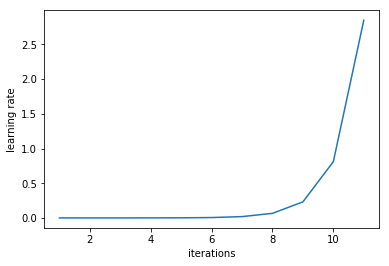

In [14]:
learn.sched.plot_lr()

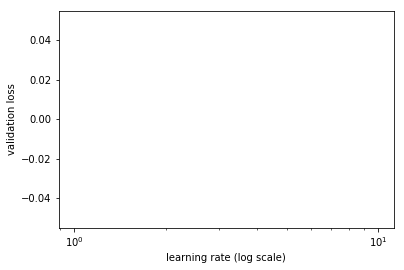

In [15]:
learn.sched.plot()

In [16]:
learn.fit(1e-1, 5, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                   
    0      0.092471   0.144692   0.943098  
    1      0.09089    0.139872   0.942044                   
    2      0.089343   0.137933   0.943098                   
    3      0.086638   0.138014   0.944152                   
    4      0.085745   0.142073   0.945205                   



[array([0.14207]), 0.9452054933325885]

In [17]:
def get_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'JPEGImages', f'{PATH}labels2.csv', # we need to specify where the test set is if you want to submit to Kaggle competitions
                                   val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
    return data if sz > 300 else data.resize(340, 'tmp')
                                             
                                             


In [151]:
learn.save('224_pre')

In [152]:
learn.load('224_pre')

In [18]:
learn.set_data(get_data(299, bs)) 
learn.freeze()

In [154]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 299, 299]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 75, 75]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 75, 

In [155]:
learn.fit(1e-1, 3, cycle_len=1)

epoch      trn_loss   val_loss   <lambda>                
    0      0.651474   0.555012   0.744995  
    1      0.647726   0.551238   0.755532                
    2      0.642718   0.54053    0.775553                



[array([0.54053]), 0.7755532174894254]

In [19]:
learn.fit(1e-1, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.105469   0.160821   0.940991  
    1      0.102389   0.153444   0.940991                  
    2      0.098452   0.151621   0.939937                   
    3      0.095029   0.154386   0.943098                   
    4      0.091023   0.148975   0.943098                   
    5      0.087668   0.145641   0.940991                   
    6      0.084969   0.146681   0.940991                   



[array([0.14668]), 0.9409905190337194]

In [157]:
learn.save('299_pre')

In [7]:
learn.load('299_pre')

In [8]:
learn.unfreeze()

In [9]:
lr=np.array([1e-3,1e-2,1e-1])

In [10]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.783085   0.669793   0.595364  
    1      0.65907    0.39164    0.890411                  
    2      0.533342   0.318673   0.930453                  
    3      0.425811   0.153184   0.955743                  
    4      0.331469   0.114865   0.959958                  
    5      0.26091    0.107176   0.962065                  
    6      0.212575   0.10482    0.961012                  



[array([0.10482]), 0.96101158204144]

In [14]:
learn.save('299_pre')

In [15]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                  
    0      0.431553   0.374048   0.908325  
    1      0.414681   0.349076   0.919916                  
    2      0.401576   0.341184   0.926238                  
    3      0.38896    0.307258   0.938883                  
    4      0.371259   0.288536   0.944152                  
    5      0.354704   0.276771   0.945205                  
    6      0.341682   0.280546   0.947313                  



[array([0.28055]), 0.9473129633354814]

In [18]:
len(data.val_ds.fnames)

73

In [19]:
lrt = learn.lr_find()

epoch      trn_loss   val_loss   <lambda>                  
    0      0.29829    17.498675  0.366702  



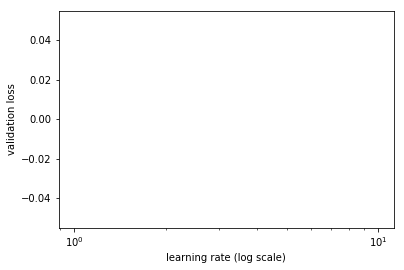

In [23]:
learn.sched.plot()